In [193]:
import pandas as pd

### Open CSV File
The source of file is kaggle:
https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [194]:
df = pd.read_csv("Mall_Customers.csv")

In [195]:
print(df.shape)
df.head()

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Check the gender attribute

In [196]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

### Histogram of age distribution

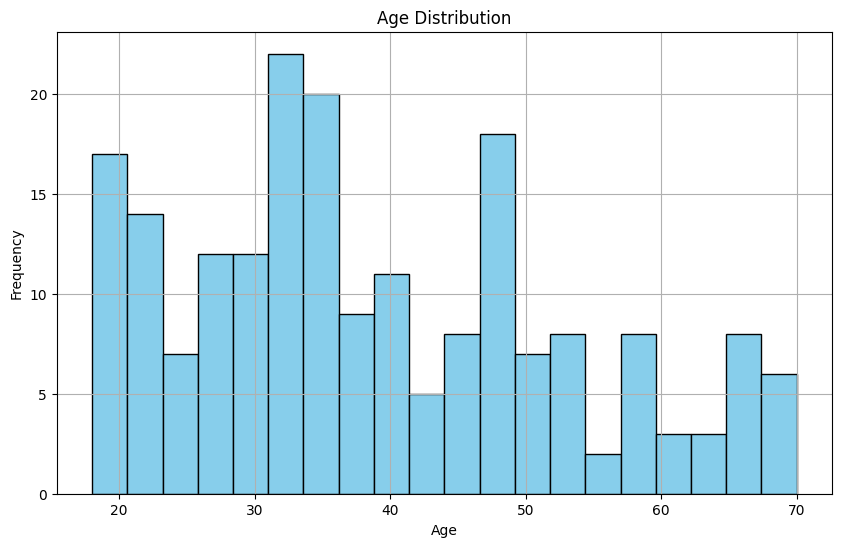

In [197]:
import matplotlib.pyplot as plt
ages = df['Age']
plt.figure(figsize=(10, 6))
plt.hist(ages, bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Preprocessing

In [198]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])

df.rename(columns={'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace=True)

### Fit data

In [199]:
import numpy as np
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

### Group customers

In [200]:
from sklearn.cluster import KMeans 
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 3 2 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 0 1 4 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 4 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


In [201]:
df["Clus_km"] = labels
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Clus_km
0,1,1,19,15,39,2
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,3
4,5,0,31,17,40,2


In [202]:
df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
Clus_km,,,,,
0,163.500000,0.527778,40.666667,87.750000,17.583333
1,162.000000,0.461538,32.692308,86.538462,82.128205
2,23.000000,0.391304,45.217391,26.304348,20.913043
3,24.000000,0.391304,25.521739,26.304348,78.565217
4,86.265823,0.417722,43.088608,55.291139,49.569620


### The distribution of segments

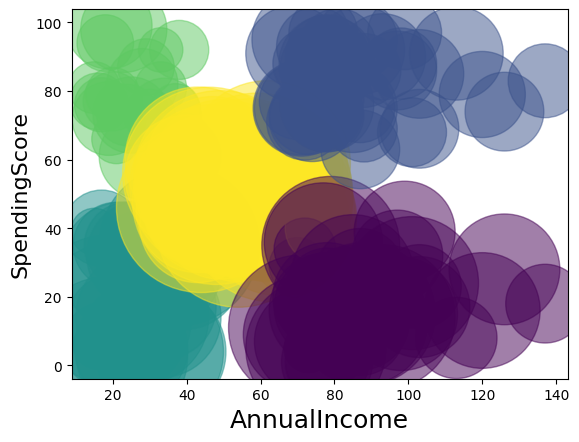

In [203]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 2], X[:, 3], s=area, c=labels.astype(np.float_), alpha=0.5)
plt.xlabel('AnnualIncome', fontsize=18)
plt.ylabel('SpendingScore', fontsize=16)

plt.show()

### Show 3d plot of segments

In [6]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

ax.scatter(X[:, 1], X[:, 2], X[:, 3], c= labels.astype(np.float_))


NameError: name 'plt' is not defined